In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('kaupskra.csv', usecols=('faerslunumer', 'postnr', 'sveitarfelag', 'utgdag', 'kaupverd', 'fasteignamat', 'byggar', 'einflm', 'lod_flm', 'tegund', 'fullbuid', 'onothaefur_samningur')) 
df.head()

,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,569113,200.0,Kópavogsbær,7/30/2012 0:00,87000,70850,1985,780.4,1105.0,Atvinnuhusnaedi,1,0
1,558760,220.0,Hafnarfjarðarkaupstaður,2/28/2011 0:00,36000,40790,1983,400.0,3000.0,Atvinnuhusnaedi,1,0
2,566833,104.0,Reykjavíkurborg,4/16/2012 0:00,31000,4679,1962,310.2,565.0,Atvinnuhusnaedi,1,1
3,566833,104.0,Reykjavíkurborg,4/16/2012 0:00,31000,5516,1962,310.2,565.0,Atvinnuhusnaedi,1,1
4,628860,104.0,Reykjavíkurborg,2/20/2018 0:00,23500,13200,1962,71.4,565.0,Atvinnuhusnaedi,1,0


In [3]:
df = df[df["onothaefur_samningur"] == 0]
df = df[df["tegund"].isin(['Serbyli', 'Fjolbyli', 'Atvinnuhusnaedi'])]
df = df[df["sveitarfelag"].isin(['Kópavogsbær', 'Hafnarfjarðarkaupstaður', 'Reykjavíkurborg', 'Mosfellsbær'])]
df.head()


,faerslunumer,postnr,sveitarfelag,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,tegund,fullbuid,onothaefur_samningur
0,569113,200.0,Kópavogsbær,7/30/2012 0:00,87000,70850,1985,780.4,1105.0,Atvinnuhusnaedi,1,0
1,558760,220.0,Hafnarfjarðarkaupstaður,2/28/2011 0:00,36000,40790,1983,400.0,3000.0,Atvinnuhusnaedi,1,0
4,628860,104.0,Reykjavíkurborg,2/20/2018 0:00,23500,13200,1962,71.4,565.0,Atvinnuhusnaedi,1,0
11,686375,105.0,Reykjavíkurborg,3/25/2022 0:00,25500,10650,1992,47.5,5702.0,Atvinnuhusnaedi,1,0
12,685833,105.0,Reykjavíkurborg,3/7/2022 0:00,68250,55700,1992,109.9,5702.0,Fjolbyli,1,0


In [4]:
df = df.drop(['onothaefur_samningur', 'faerslunumer'], axis=1)
df.dropna(inplace=True)

In [5]:
df = df[df.byggar != ' ']
df['byggar'] = df['byggar'].astype(int)

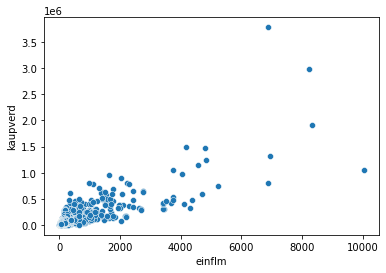

In [6]:
sns.scatterplot(x='einflm', y='kaupverd', data=df)
plt.show()

In [7]:
Q1 = df.quantile(0.10)
Q3 = df.quantile(0.90)
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

C:\Users\halld\AppData\Local\Temp\ipykernel_18740\3233543811.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]


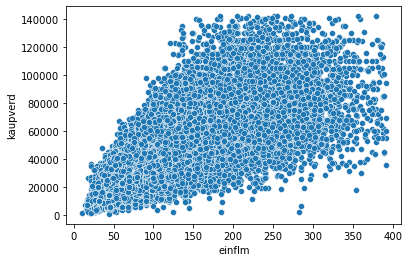

In [8]:
sns.scatterplot(x='einflm', y='kaupverd', data=df)
plt.show()

In [9]:
df['utgdag'] = df['utgdag'].str[:-4]
df['utgdag'] = pd.to_datetime(df['utgdag'])
df.sort_values('utgdag', ascending=True, inplace=True)
data = pd.get_dummies(df, columns = ['postnr', 'sveitarfelag', 'tegund'])
data.head()

,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,fullbuid,postnr_101.0,postnr_102.0,postnr_103.0,...,postnr_221.0,postnr_270.0,postnr_271.0,sveitarfelag_Hafnarfjarðarkaupstaður,sveitarfelag_Kópavogsbær,sveitarfelag_Mosfellsbær,sveitarfelag_Reykjavíkurborg,tegund_Atvinnuhusnaedi,tegund_Fjolbyli,tegund_Serbyli
86686,2006-03-01,11050,17330,1958,224.0,7000.0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,1
38968,2006-03-14,24700,19820,1988,112.3,1285.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
112433,2006-03-17,65000,43800,2003,290.7,632.8,1,0,0,0,...,1,0,0,1,0,0,0,0,0,1
62152,2006-04-10,11900,12090,1972,78.1,7940.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0
107788,2006-04-21,17300,15110,1993,89.0,1339.0,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [10]:
X = data.drop('kaupverd', axis=1)
y = data['kaupverd']
X.set_index('utgdag', inplace=True)

In [11]:
X_train = X[:int(X.shape[0]*0.8)]
X_test = X[int(X.shape[0]*0.8):]
y_train = y[:int(X.shape[0]*0.8)]
y_test = y[int(X.shape[0]*0.8):]

In [13]:
regr = LinearRegression()
regr.fit(X_train,y_train)
regr.score(X_train,y_train)

0.8530601795336933

In [14]:
y_hat = regr.predict(X_test)

In [15]:
len(X_train.columns)

35

In [16]:
combined = data[int(data.shape[0]*0.8):]
combined['predicted price'] = y_hat
combined.head()

C:\Users\halld\AppData\Local\Temp\ipykernel_18740\2203313243.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined['predicted price'] = y_hat


,utgdag,kaupverd,fasteignamat,byggar,einflm,lod_flm,fullbuid,postnr_101.0,postnr_102.0,postnr_103.0,...,postnr_270.0,postnr_271.0,sveitarfelag_Hafnarfjarðarkaupstaður,sveitarfelag_Kópavogsbær,sveitarfelag_Mosfellsbær,sveitarfelag_Reykjavíkurborg,tegund_Atvinnuhusnaedi,tegund_Fjolbyli,tegund_Serbyli,predicted price
162351,2020-04-03,60900,23350,2020,102.7,3720.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,32736.121606
45669,2020-04-03,38000,36350,1928,77.7,750.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,37340.856624
119163,2020-04-03,45500,43200,1964,123.2,4308.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,47581.557042
5571,2020-04-03,71400,68050,1979,202.4,616.0,1,0,0,0,...,0,0,0,1,0,0,0,1,0,76413.063722
101328,2020-04-03,50800,45300,1993,124.1,6346.0,1,0,0,0,...,0,0,0,0,0,1,0,1,0,49522.679168


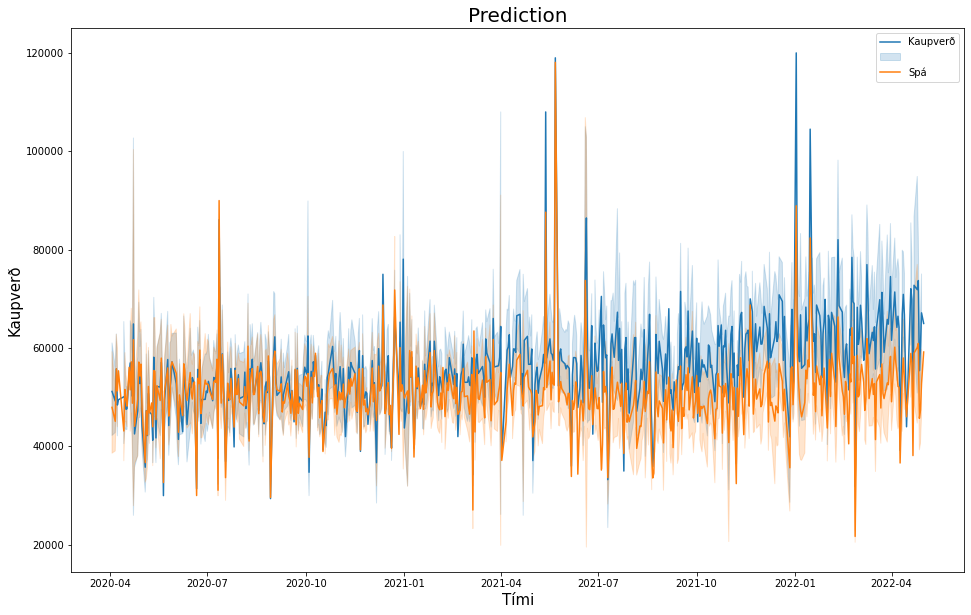

In [ ]:
plt.figure(figsize=(16,10))
sns.lineplot(x='utgdag', y='kaupverd', data=combined)
sns.lineplot(x='utgdag', y='predicted price', data=combined)
plt.title('Prediction', fontsize='20')
plt.xlabel('Tími', fontsize='15')
plt.ylabel('Kaupverð', fontsize='15')
plt.legend(['Kaupverð', '', 'Spá'])


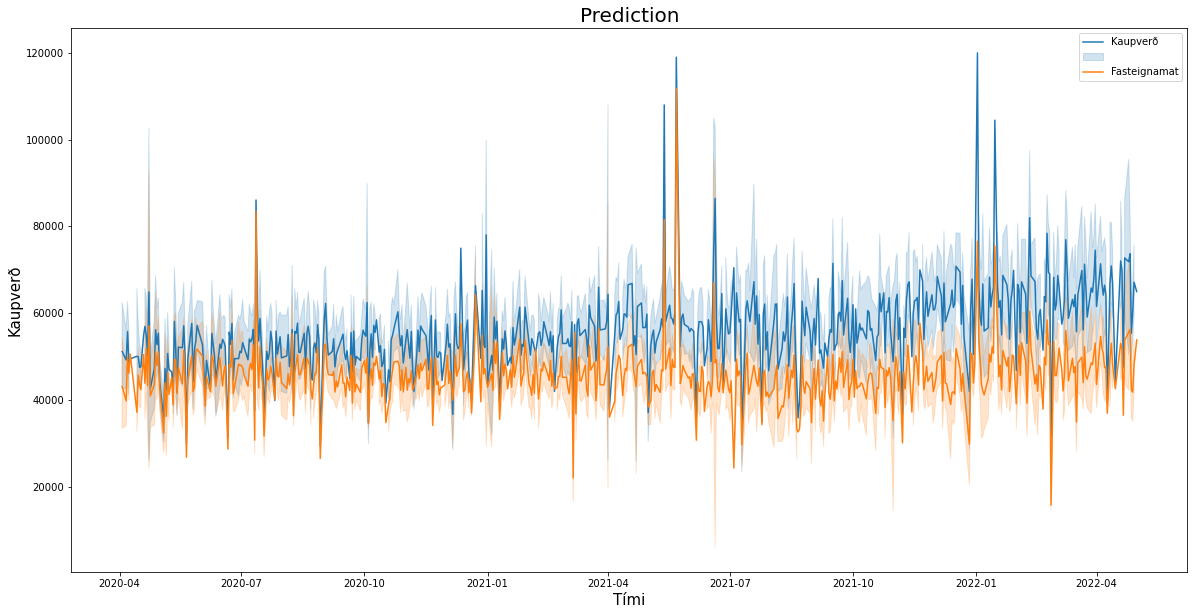

In [ ]:
plt.figure(figsize=(20,10))
sns.lineplot(x='utgdag', y='kaupverd', data=combined)
sns.lineplot(x='utgdag', y='fasteignamat', data=combined)
plt.title('Prediction', fontsize='20')
plt.xlabel('Tími', fontsize='15')
plt.ylabel('Kaupverð', fontsize='15')
plt.legend(['Kaupverð', '', 'Fasteignamat'])

In [ ]:
importance = regr.coef_
importance = pd.DataFrame(importance).T
importance.columns = X_test.columns
importance = importance.T
importance.head()

,0
fasteignamat,9.120883e-01
byggar,9.908835e+01
einflm,5.058749e+01
lod_flm,-2.946986e-02
fullbuid,2.047273e-09


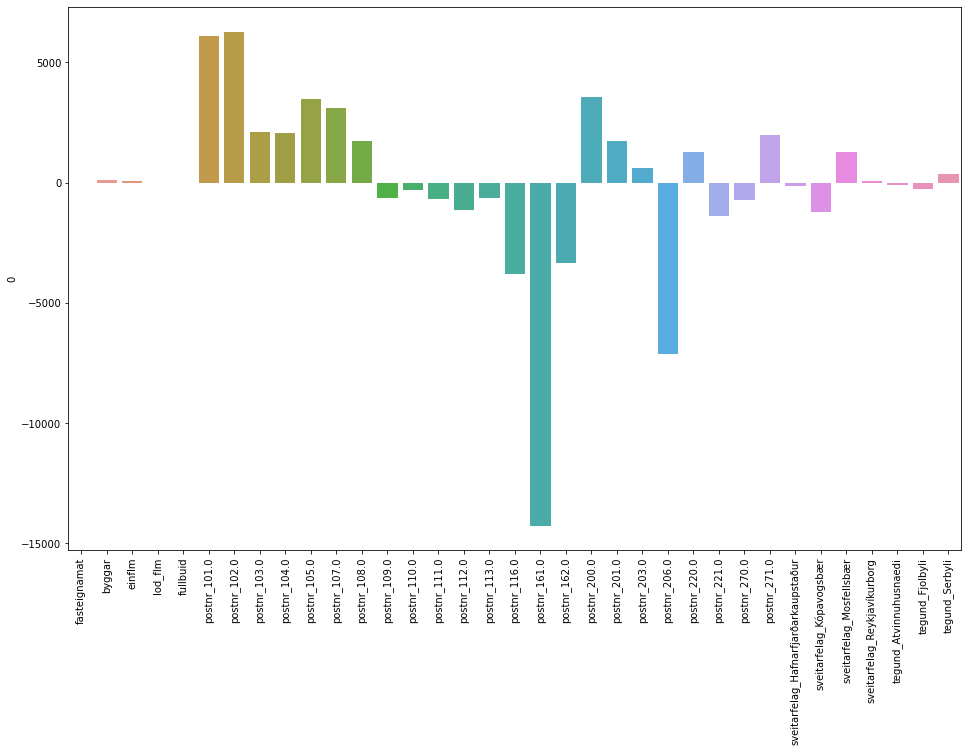

In [ ]:
plt.figure(figsize=(16,10))
sns.barplot(x=importance.index, y=0, data=importance)
plt.xticks(rotation = 90)
plt.savefig('Coefficient Importance')

In [ ]:
scaler = preprocessing.MinMaxScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=['x1', 'x2', 'x3'])